# 海南MME KPI分析 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
xlsfile = pd.ExcelFile('R:/hainan/f_ddd_qs_0920.xlsx')
city_namemap = {u'乐东' : 'ledong',
            u'五指山' : 'wuzhishan',
            u'东方' : 'dongfang',
            u'保亭' : 'baoting',
           }
           
str2datetime=lambda d,h:pd.to_datetime("%s %02d" % (d, int(h)))

In [3]:
srcdf=pd.read_excel(xlsfile)
#将日期和时间合并成"日期 时间"格式
srcdf['time'] = map(str2datetime, srcdf.Date, srcdf.Hour)
#将原Data/Hour字段丢弃
srcdf.drop(['Date','Hour'], axis=1, inplace=True)
#将time作为DF的index
srcdf.set_index('time', inplace=True)

In [4]:
srcdf.head()

,City,AttachRatio,AttachDelay,EpsRatio,EpsDelay,PagingRatio,PagingDelay,TauRatio,TauDelay
time,,,,,,,,,
2018-09-16,乐东,0.949011,847.142761,0.981115,147.863820,0.999942,499.694703,0.888619,229.010763
2018-09-16,东方,0.974571,505.676954,0.987891,97.015913,0.999907,531.952838,0.992115,226.679581
2018-09-16,白沙,0.998209,562.092680,0.972803,98.561572,0.999861,480.492199,0.978473,422.941948
2018-09-16,琼中,0.933339,617.984913,0.986108,83.600014,0.999943,546.225212,0.982368,310.991551
2018-09-16,陵水,0.911105,901.256174,0.963160,88.846591,0.999919,534.663319,0.996997,180.220135


## 1. KPI分析

### 1.0  数据准备

In [5]:
kpiset={}
for kpi in srcdf.columns:
    kpiset[kpi]=srcdf.pivot(columns='City', values=kpi)
    
selected_cities=[u'乐东',u'五指山',u'东方',u'保亭',u'儋州',u'临高',u'白沙',u'昌江',u'澄迈']    

### 1.1 Attach分析

#### 1.1.1 Attach附着成功率

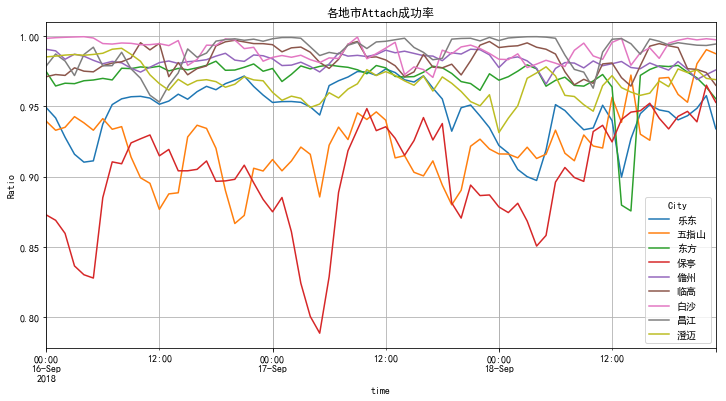

In [6]:
ax=kpiset['AttachRatio'][selected_cities].plot.line(figsize=(12,6),title=u'各地市Attach成功率',grid=True)
ax.set_ylabel('Ratio')
ax.grid('on', which='minor')

#### 1.1.2 Attach附着时延分析

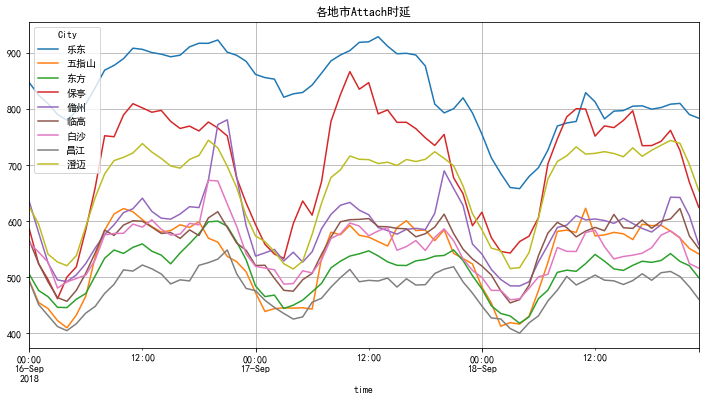

In [7]:
ax=kpiset['AttachDelay'][selected_cities].plot.line(figsize=(12,6),title=u'各地市Attach时延',grid=True)

### 1.2 TAU分析

####  1.2.1 TAU成功率

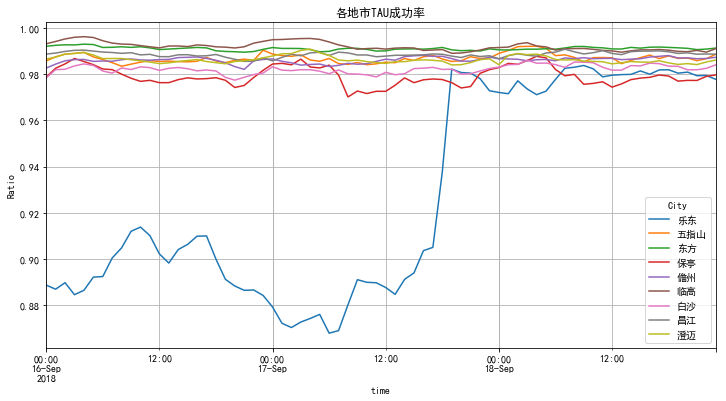

In [8]:
ax=kpiset['TauRatio'][selected_cities].plot.line(figsize=(12,6),title=u'各地市TAU成功率',grid=True)
ax.set_ylabel('Ratio')
ax.grid('on', which='minor')

#### 1.2.2 TAU时延分析

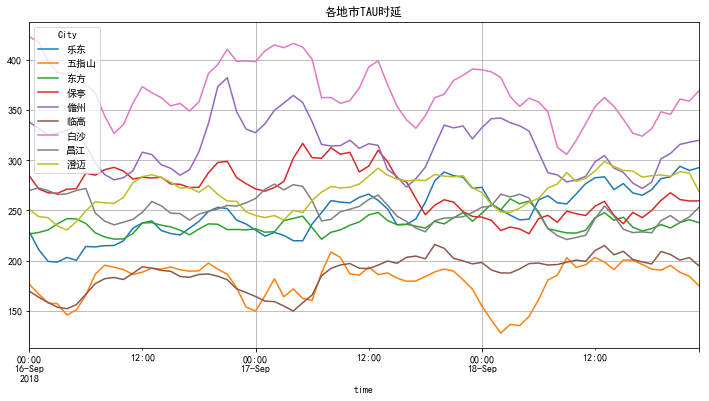

In [9]:
ax=kpiset['TauDelay'][selected_cities].plot.line(figsize=(12,6),title=u'各地市TAU时延',grid=True)

### 1.3 Paging分析

####  1.3.1 Paging寻呼成功率

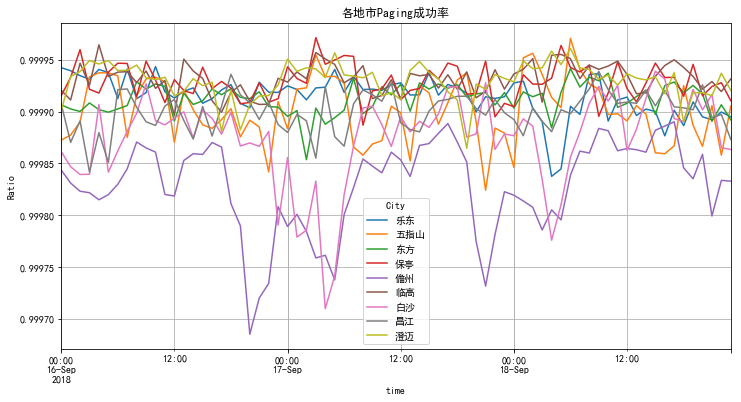

In [10]:
ax=kpiset['PagingRatio'][selected_cities].plot.line(figsize=(12,6),title=u'各地市Paging成功率',grid=True)
#ax.set_ylim([0.9,1.0])
#ax.set_yticks(yticks)
ax.set_ylabel('Ratio')
ax.grid('on', which='minor')

####  1.3.2 Paging寻呼时延

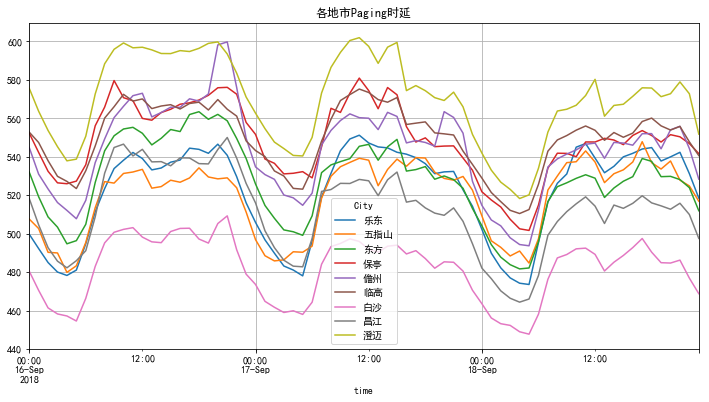

In [11]:
ax=kpiset['PagingDelay'][selected_cities].plot.line(figsize=(12,6),title=u'各地市Paging时延',grid=True)

### 1.4 EPS分析

#### 1.4.1 EPS成功率

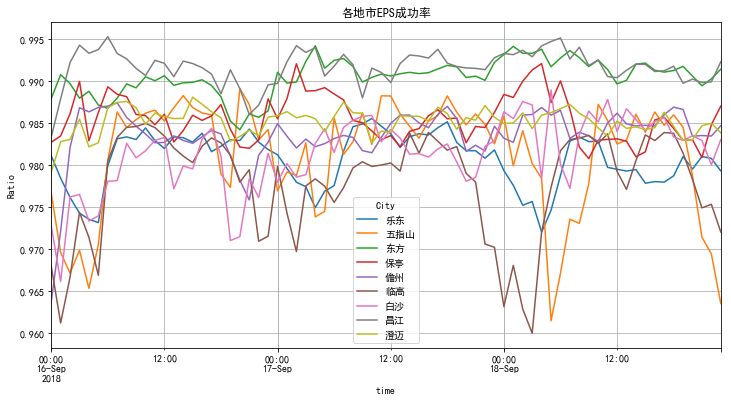

In [12]:
ax=kpiset['EpsRatio'][selected_cities].plot.line(figsize=(12,6),title=u'各地市EPS成功率',grid=True)
ax.set_ylabel('Ratio')
ax.grid('on', which='minor')

#### 1.4.2  EPS时延

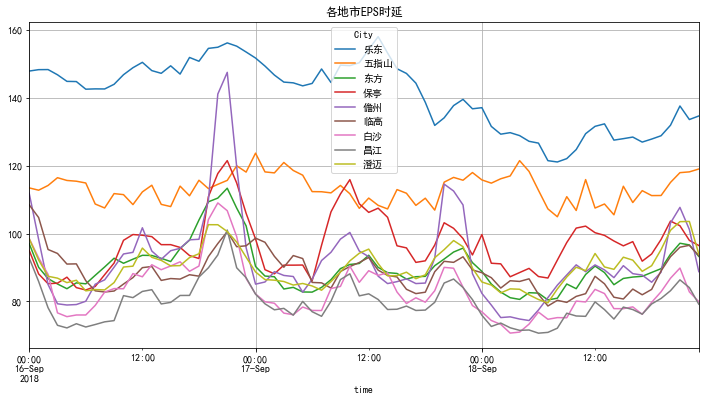

In [13]:
ax=kpiset['EpsDelay'][selected_cities].plot.line(figsize=(12,6),title=u'各地市EPS时延',grid=True)

## 2 地市KPI分析

### 2.0 数据准备

In [14]:
ratio_name=[key for key in srcdf.columns if 'Ratio' in key]
delay_name=[key for key in srcdf.columns if 'Delay' in key]
kpicity={}
for k,v in city_namemap.items():
    kpicity[v] = srcdf[srcdf.City==k]

In [15]:
kpicity['baoting'].head()

,City,AttachRatio,AttachDelay,EpsRatio,EpsDelay,PagingRatio,PagingDelay,TauRatio,TauDelay
time,,,,,,,,,
2018-09-16 00:00:00,保亭,0.872766,586.662408,0.982709,95.026878,0.999915,552.224172,0.978762,284.567341
2018-09-16 01:00:00,保亭,0.868919,524.121055,0.983452,88.101368,0.999933,542.161721,0.982600,271.454729
2018-09-16 02:00:00,保亭,0.859607,495.826295,0.986113,85.209501,0.999960,532.348491,0.984493,267.579081
2018-09-16 03:00:00,保亭,0.836481,461.801382,0.989951,85.380289,0.999922,526.351411,0.986825,267.112222
2018-09-16 04:00:00,保亭,0.830219,500.358451,0.982879,87.144249,0.999918,525.891851,0.985526,271.165941


### 2.1 乐东KPI对比 

#### 成功率对比

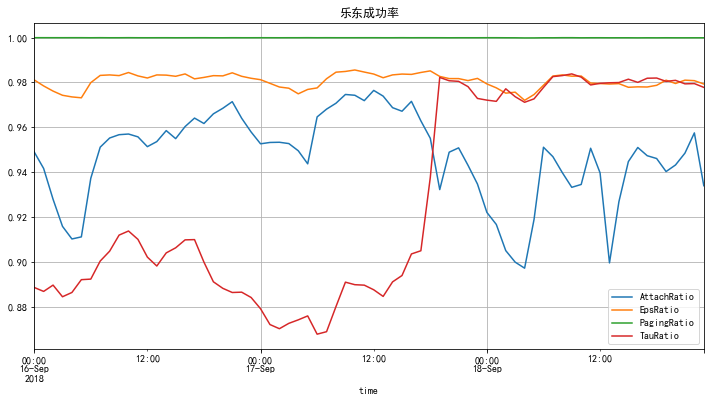

In [16]:
kpicity['ledong'][ratio_name].plot.line(figsize=(12,6), grid=True, title=u'乐东成功率')
ax.set_ylabel('Ratio')
ax.grid('on', which='minor',axis='x')

####  时延对比

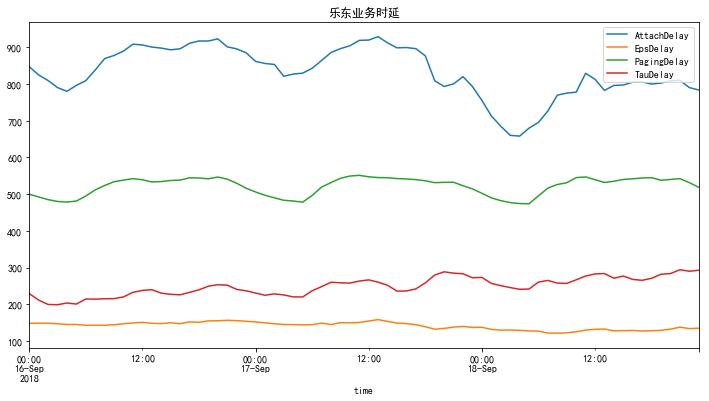

In [17]:
kpicity['ledong'][delay_name].plot.line(figsize=(12,6), title=u'乐东业务时延')

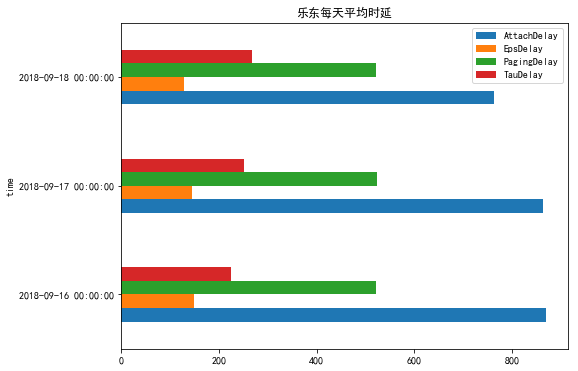

In [18]:
ld_daily=ld_delay=kpicity['ledong'][delay_name].resample('D').mean()
ld_daily.plot.barh(figsize=(8,6), title=u'乐东每天平均时延')

###  2.2 保亭KPI对比

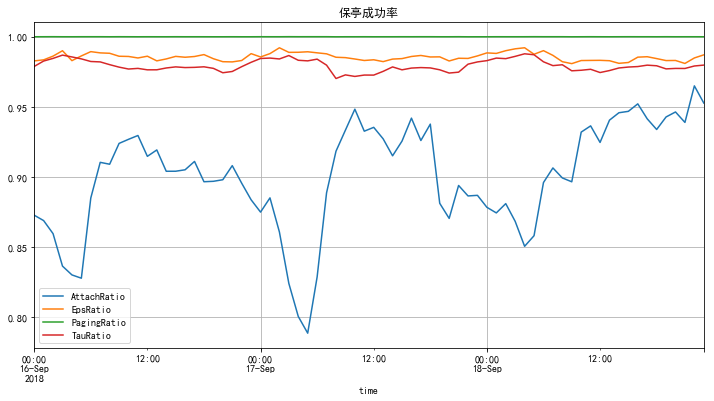

In [19]:
kpicity['baoting'][ratio_name].plot(figsize=(12,6), grid=True, title=u'保亭成功率')

#### 时延对比

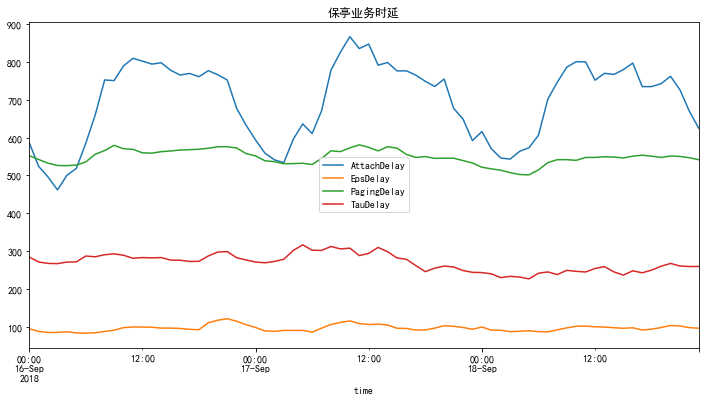

In [20]:
kpicity['baoting'][delay_name].plot.line(figsize=(12,6), title=u'保亭业务时延')

### 2.3 五指山KPI

####  成功率对比

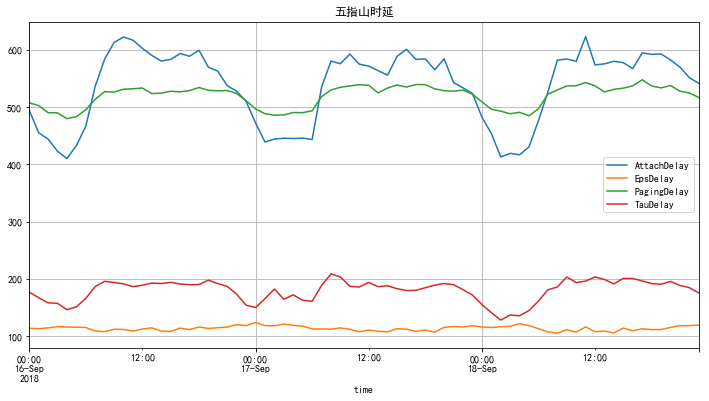

In [21]:
kpicity['wuzhishan'][delay_name].plot(figsize=(12,6), grid=True, title=u'五指山时延')